In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv("/content/creditcard.csv.zip")

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


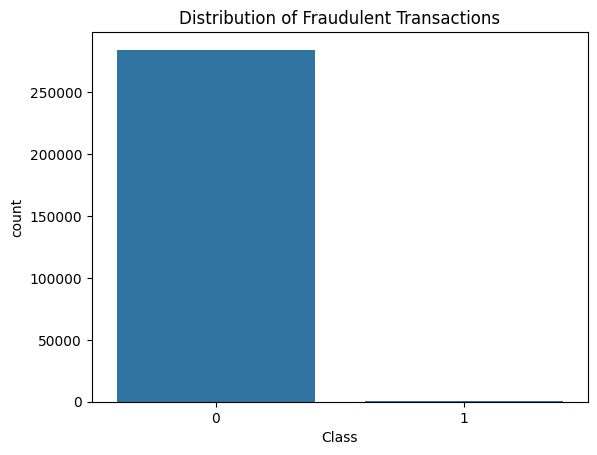

In [8]:
sns.countplot(x='Class', data=df)
plt.title('Distribution of Fraudulent Transactions')
plt.show()

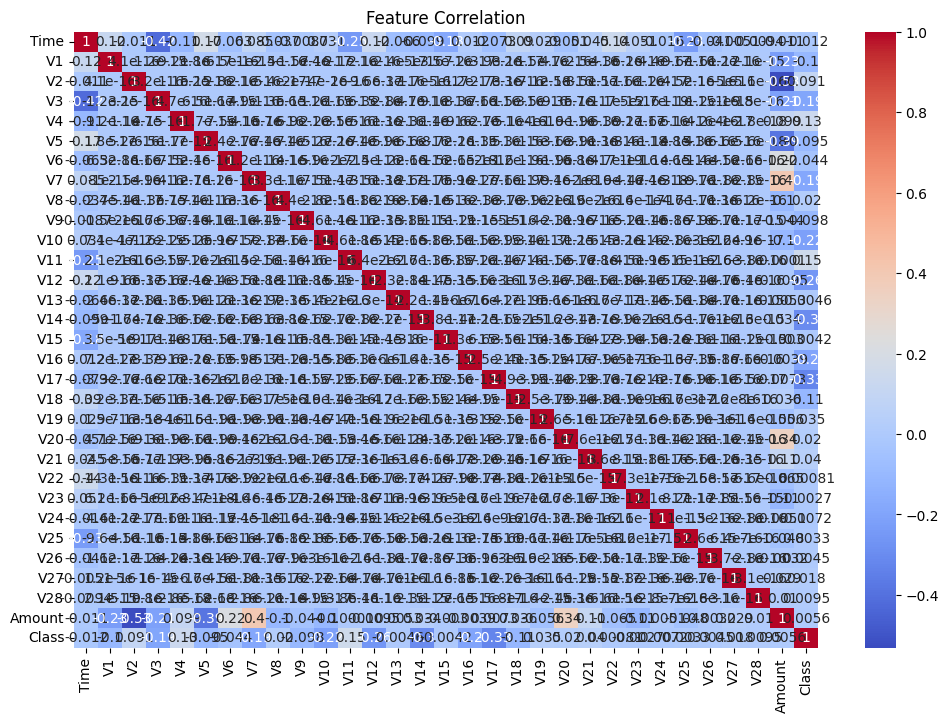

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

In [10]:
if 'transcation_id' in df.columns:
    df.drop('transcation_id', axis=1, inplace=True)

In [11]:
df = pd.get_dummies(df, drop_first=True)

In [12]:
scaler = StandardScaler()
features = df.drop('Class', axis=1)
X = scaler.fit_transform(features)
y = df['Class']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [14]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [15]:

print("Logistic Regression")
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.64      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962

[[56851    13]
 [   35    63]]


In [16]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [17]:
print("Random Forest")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.94      0.82      0.87        98

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.94     56962
weighted avg       1.00      1.00      1.00     56962

[[56859     5]
 [   18    80]]


In [18]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

In [19]:
print("XGBoost Classifier")
print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))

XGBoost Classifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.80      0.83        98

    accuracy                           1.00     56962
   macro avg       0.93      0.90      0.91     56962
weighted avg       1.00      1.00      1.00     56962

[[56852    12]
 [   20    78]]


In [20]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [21]:
from sklearn.metrics import roc_curve, auc


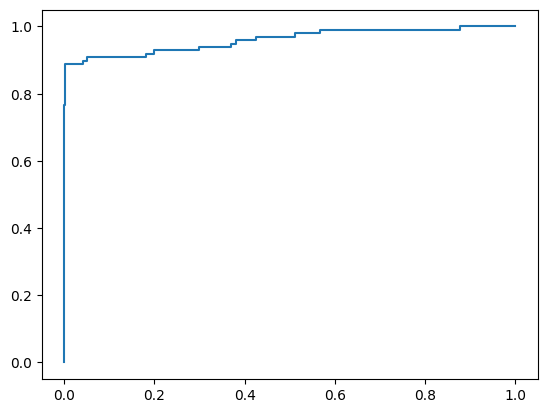

In [22]:
y_probs_lr = lr.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_probs_lr)
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')

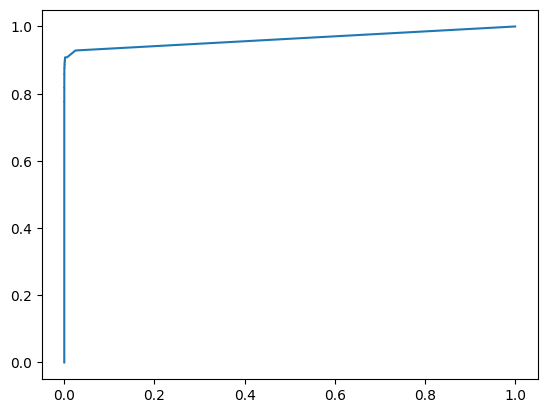

In [23]:
y_probs_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
plt.plot(fpr_rf, tpr_rf, label='Random Forest')

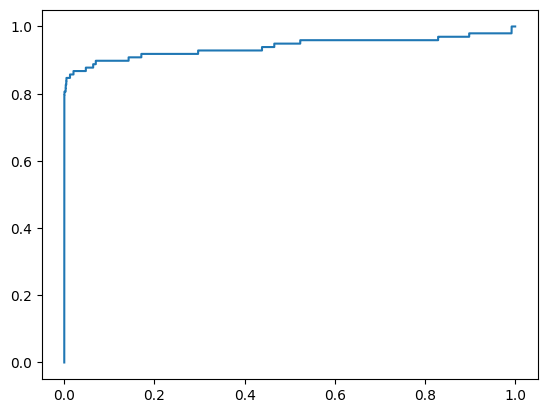

In [24]:
y_probs_xgb = xgb.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_probs_xgb)
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')

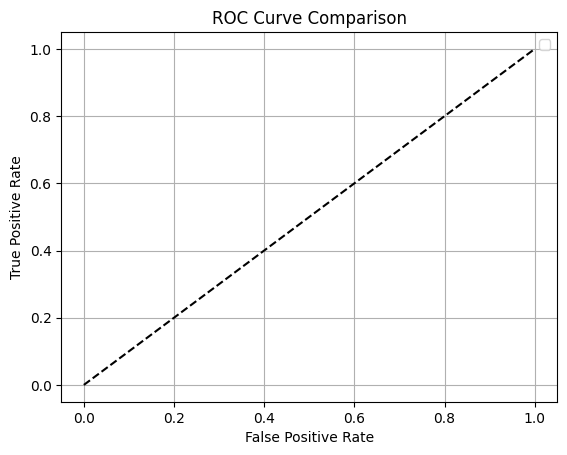

In [25]:
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1],
}

In [27]:
grid = GridSearchCV(estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
                    param_grid=param_grid,
                    cv=3,
                    scoring='f1',
                    verbose=1,
                    n_jobs=-1)

grid.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraint...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 6, 10],
                         'n_estimators': [100, 200], 'subsample': [0.8, 1]},
             scoring='f1', verbose=1)

In [28]:
best_model = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.8}


In [29]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', best_model)
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [32]:
# Create a sample with 30 features, matching the training data's structure.
# You'll need to replace the zeros with actual values for a meaningful prediction.
sample = np.zeros((1, 30))
# Assuming 'Amount' is the 29th feature (index 28) and 'Time' is the 0th feature (index 0)
# and the other features correspond to the V1-V28 columns
sample[0, 0] = 120.0 # Example Time
sample[0, 29] = 5000 # Example Amount
# You would fill in the rest of the V1-V28 features here if you had sample data for them.

sample_pred = pipeline.predict(sample)
print("Prediction (0 = Not Fraud, 1 = Fraud):", sample_pred[0])

Prediction (0 = Not Fraud, 1 = Fraud): 0


In [33]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 90.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 126.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.5 MB/s eta 0:00:00


In [64]:
%%writefile app.py
import streamlit as st
import numpy as np
import joblib
import pandas as pd

# Load the saved pipeline
try:
    pipeline = joblib.load('fraud_detection_pipeline.pkl')
except FileNotFoundError:
    st.error("Error: fraud_detection_pipeline.pkl not found. Please run the model training and saving steps first.")
    st.stop()


st.title("🔍 Real-Time Fraud Detection Simulator")

st.write("Enter the transaction details below to predict if it is fraudulent.")

# Create input fields for the features
# Based on the original dataframe structure (excluding 'Class')
input_features = {}
input_features['Time'] = st.number_input("Time", value=0.0)
# The V features are anonymized, so we'll create generic inputs for them
for i in range(1, 29):
    input_features[f'V{i}'] = st.number_input(f"V{i}", value=0.0)
input_features['Amount'] = st.number_input("Amount", value=0.0)

# Create a button to trigger prediction
if st.button("Predict Fraud"):
    # Create a numpy array from the input features in the correct order
    # Ensure the order matches the columns the pipeline was trained on
    feature_order = ['Time'] + [f'V{i}' for i in range(1, 29)] + ['Amount']
    user_input = np.array([input_features[feature] for feature in feature_order]).reshape(1, -1)

    # Predict using the pipeline
    prediction = pipeline.predict(user_input)[0]

    # Display the result
    result = "Fraudulent ❌" if prediction == 1 else "Legitimate ✅"
    st.success(f"Transaction is {result}")

Overwriting app.py


In [65]:
df = pd.read_csv("/content/creditcard.csv.zip")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [66]:
df = pd.get_dummies(df, drop_first=True)  # Handle categoricals
X = df.drop('Class', axis=1)
y = df['Class']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [68]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])


In [69]:

pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('xgb',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric='logloss',
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [70]:
import joblib

In [71]:
joblib.dump(pipeline, 'fraud_detection_pipeline.pkl')


['fraud_detection_pipeline.pkl']

In [72]:
model = joblib.load('fraud_detection_pipeline.pkl')


In [73]:
import streamlit as st


In [74]:
model = joblib.load('fraud_detection_pipeline.pkl')

st.title("🔍 Real-Time Fraud Detection Simulator")

2025-08-12 06:55:45.483 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-12 06:55:45.484 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-12 06:55:45.485 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [75]:
amount = st.number_input("Transaction Amount")
feature1 = st.selectbox("Feature 1 (is_international)", [0, 1])
feature2 = st.selectbox("Feature 2 (card_present)", [0, 1])
feature3 = st.selectbox("Feature 3 (online)", [0, 1])
balance = st.number_input("Account Balance")
feature4 = st.selectbox("Feature 4", [0, 1])
feature5 = st.selectbox("Feature 5", [0, 1])
feature6 = st.selectbox("Feature 6", [0, 1])

2025-08-12 06:55:46.287 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-12 06:55:46.288 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-12 06:55:46.289 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-12 06:55:46.290 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-12 06:55:46.290 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-12 06:55:46.291 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-12 06:55:46.291 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-12 06:55:46.292 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [76]:
if st.button("Predict Fraud"):
    user_input = np.array([[amount, V1, V2, V3, balance, V4, V5, V6]])
    prediction = model.predict(user_input)[0]
    result = "Fraudulent ❌" if prediction == 1 else "Legitimate ✅"
    st.success(f"Transaction is {result}")

2025-08-12 06:55:47.194 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-12 06:55:47.195 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-12 06:55:47.195 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-12 06:55:47.196 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-12 06:55:47.196 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-12 06:55:47.197 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [77]:
!pip install pyngrok

In [78]:
!ngrok config add-authtoken YOUR_AUTHTOKEN_HERE


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [79]:
!ngrok config add-authtoken 2wXmWXNnOeaEkEzF6fepuiNIrf6_322P5buwUndXcXPrkJwdc


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [80]:
!cat /root/.ngrok2/ngrok.yml


authtoken: YOUR_AUTHTOKEN_HERE


In [81]:
!mkdir -p /root/.ngrok2
!echo "authtoken: YOUR_AUTHTOKEN_HERE" > /root/.ngrok2/ngrok.yml


In [84]:
!pip install ngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 46.4 MB/s eta 0:00:00


In [86]:
import ngrok

In [87]:
public_url = ngrok.connect(addr="8501", proto="http")


In [88]:
from pyngrok import ngrok

get_ipython().system('pkill streamlit')

get_ipython().system_raw('streamlit run app.py &')

public_url = ngrok.connect(addr="8501", proto="http")
print("🚀 Streamlit App is Live at:", public_url)


ERROR:asyncio:Task exception was never retrieved
future: <Task finished name='Task-4' coro=<wrap() done, defined at ngrok_wrapper:6> exception=ValueError('failed to connect session', 'Usage of ngrok requires a verified account and authtoken.\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken', 'ERR_NGROK_4018')>
Traceback (most recent call last):
  File "ngrok_wrapper", line 7, in wrap
ValueError: ('failed to connect session', 'Usage of ngrok requires a verified account and authtoken.\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken', 'ERR_NGROK_4018')


🚀 Streamlit App is Live at: NgrokTunnel: "https://9071d38ea30d.ngrok-free.app" -> "http://localhost:8501"
